### 3.2.2 Classifying users with community Detection and sentiment analysis

#### 3.2.2.1 Motive

This section is about how to approach the network in terms of partitioning. The immediate intention of this project was to investigate differences and simmiliarities across cadidate supports on reddit. However this approach presumes that users posting comments on a candidate subreddit do in fact support the cadidate. This might be an naiv assumption without any further investigation. 

By turning the appraoching upside down we can look into the significant community structures within the graph and check whether these corralates with the users from_subreddit attribute. **This will reviel the optimal partioning for the two candidate supporter groups (ved ikke helt hvad jeg skal skrive lol)** or whether talking about trump and biden supporters as such is misleading in this context.


#### 3.2.2.2 Tools

**Modularity scores to detect community structures**

To validate the different partitionings of the network modularity is used. Modularity is a score that ranges from $[-\frac{1}{2}\  ; 1]$ and compares the wiring within communities with wiring across communities. 

Modularity for a partioning of $n_c$ communities:


$$M_{c}=\sum_{c=1}^{n_c}\left[ \frac{L_c}{L}- \left( \frac{k_c}{2L} \right) ^2 \right]$$

\\
With $L_c$ being links within the community $C_c$ and $k_c$ being the total degree the nodes in the community.

In a paper on community detection$^{[1]}$ it is stated that a modularity differing from 0 indicates a deviation from randomness, but that a score on above 0.3 is required before a significant community structure can be found in the network.

*$[1]$: Fast algorithm for detecting community structure in networks. M. E. J. Newman*




**Louvain for optimal partitioning**

Louvain algorithm is used to identify "the best" community partitioning in the graph. The algorithm belongs to the class of modularity maximization algorithms for community detection. Thus our search for community structure is following hypothesis H4 (Barabasi, section 9.4), namely that the partition of maximal modularity corresponds to the optimal community structure. 

According to the paper (Blondel et. alia 2008) (https://arxiv.org/abs/0803.0476) the algorithm works in two phases that repeats iteratively:

***Phase one***: Each node $i$ in a network of $N$ nodes is divided into a community for each node. Then for each neighbor $j$ of $i$, the algorithm calculates the gain in modularity $\Delta Q$ that would be achived by placing $i$ in $j$'s community $C$. This gain is calculated by 

$$
\Delta Q = \big[ \frac{\sum_{in}+k_{i,in}}{2m} - (\frac{\sum_{tot}+k_{i}}{2m})^2 \big] - \big[ \frac{\sum_{in}}{2m} - (\frac{\sum_{tot}}{2m})^2 - (\frac{k_i}{2m})^2  \big], 
$$

where $\sum_{in}$ is the sum of the weights of the links inside $C$, $\sum_{tot}$ is the sum of the weights of the links incident to nodes (i.e. links that share a node) in $C$, $k_i$ is the sum of the weights of the links incident to node $i$, $k_{i,in}$ is the sum of the weights of the links from $i$ to nodes in $C$ and finally $m$ is the sum of the weights of all the links in the network. If there is no positive gain in modularity, $i$ stays in its community. This goes on in to there are no more movements of nodes to communites that would yield a positive gain in modularity.

***Phase two***:
The second phase consists in building a new network where the nodes are the communities found in phase one. The weights of the links between the nodes (former communities) in the new network are given by summing up the weights of the links between nodes in the two former communities. After the new network has been created phase one can be reapplied. The algorithm terminates when there are no more positive gain achieved to the modularity of the network. 

To begin identifying the communities, initially the entire undirected graph network (networkx.Graph()) is loaded and the largest connected component is extracted:

**Subreddit Frequency**

Looking at the frequency of commented subreddits for users within communities will give an insight of how the communities have been partioned and reveal characteristics of the communities. 

**Sentiment analysis for alternative classification** 


Vis kal blive enige om noget her, Simon...

#### 3.2.2.3 Results and discussion

By looking at the Modularity score for the network  partitioning people based on the subreddit they have commented on, an estimate of how seperated the two groups activity on subreddit is. 

In [ ]:
# Method to partition based on the 'from_subreddit' attribute
def node_to_partition(graph, partitions):
  ntp = {}
  for idx, partition in enumerate(partitions):
    nodes_in_partition = [node for node, data in graph.nodes(data=True) if data.get("from_subreddit")==partition]
    for node in nodes_in_partition:
      ntp[node] = idx
  return ntp

# partion G into trump and biden partitions
G_ntp = node_to_partition(G, ["trump", "biden"])

# Calculate modularity for the entire network on the trump/biden partitioning in G
G_modularity = community.modularity(G_ntp, G)

print(f"\n\nModularity for trump and biden partitioning on G: {G_modularity} \n")



Modularity for trump and biden partitioning on G: 0.09175437865283112 



This partinioning seems to deviate from randomness, but 0.9 is still too low to categorize this partitioning in subreddit commented as significant.

This finding does not imply that there are no community structures what so ever. With the use of the Louvain algorithm the optimal partitioning can be found in the network to locate community structures regardless commented subreddet - revieling shared interests for both groups.

In [ ]:
# Louvain used for community detection in G
G_partition = community.best_partition(G, random_state=0)

# Extract size of each community found by Louvain
def get_community_sizes(partition_dict):
  D = partition_dict
  communities = set(D.values())
  community_sizes = []
  for k in range(len(communities)):
    size = sum(map((k).__eq__, D.values()))
    community_sizes.append(size)
  return community_sizes

G_community_size = get_community_sizes(G_partition)

print(f"Number of communities found: {len(G_community_size)}")

Number of communities found: 6


Visulization of detected communities

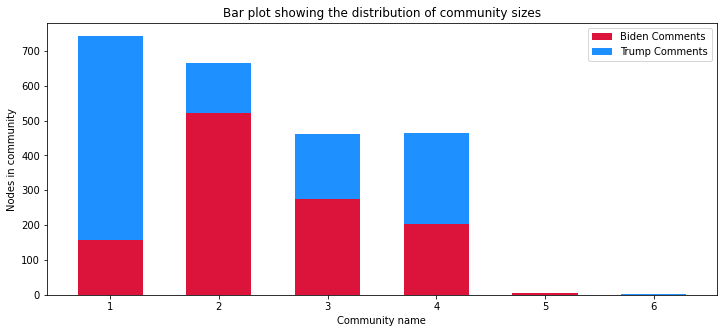

Sizes of communities: [743, 665, 461, 465, 4, 3]

Percentages for each community: 
 Trump comments: [0.21 0.78 0.59 0.43 1.   0.  ]
 Biden comments: [0.79 0.22 0.41 0.57 0.   1.  ]

Modularity for Louvain partitoning: 0.3169470769008109


In [ ]:
# Calculate numbers of trump subreddit comments in a community 
def candidateComments(community, G, partition, candidate):
  count = 0
  for node in G.nodes:
    if G.nodes[node]['from_subreddit'] == candidate and partition[node] == community:
      count = count + 1
  return count

# Make barplot collored according to candidate subreddit
def plotBarplot(trumps, bidens):
  index = np.arange(len(trumps))
  width = 0.6
  ticks = ('1', '2', '3', '4', '5', '6')

  # Generate Bar plots
  plt.figure(figsize=(12,5))
  p1 = plt.bar(index, trumps, width, color ='crimson')
  p2 = plt.bar(index, bidens, width, color ='dodgerblue', bottom=trumps)

  # Plot
  plt.title("Bar plot showing the distribution of community sizes")
  plt.xlabel("Community name")
  plt.ylabel("Nodes in community")
  plt.xticks(index, ticks[:len(trumps)])                                                            ### lav generisk
  plt.legend((p1[0], p2[0]), ('Biden Comments', 'Trump Comments'))
  plt.show()


# Calculate numbers of candidate specific comments in each community 
G_trump_comments = np.array([candidateComments(i, G, G_partition, 'trump') for i in np.arange(len(G_community_size))])
G_biden_comments = np.array([candidateComments(i, G, G_partition, 'biden') for i in np.arange(len(G_community_size))])

plotBarplot(G_trump_comments, G_biden_comments)

print(f"Sizes of communities: {G_community_size}\n")
print(f"Percentages for each community: \n Trump comments: {np.round(G_trump_comments/G_community_size, 2)}\n Biden comments: {np.round(G_biden_comments/G_community_size,2)}" )
print(f"\nModularity for Louvain partitoning: {community.modularity(G_partition, G)}")

From this plot it seems that users in some of the communities found correlates with the commented candidate subreddit (community 1,2,5,6). Furthermore the modularity score is above the threshold 0.3, meaning this partioning has a significant structure within the network.

Looking into the top common subreddits in each community, the following structures can be found:

In [ ]:
def extractUsersFromCommunity(community):
  community_1 = []
  for user in df['user']:
    try:
      if G_partition[user] is community:
        community_1.append(user)
    except:
      continue
  return community_1

def extractRedditsFromCommunity(community):
  subreddits = []
  reddit_counter = {}
  df_com = df.loc[df['user'].isin(community)].iloc[:, 2:4].copy()
  
  for subred in df_com['used_subreddits']:
    com1 = set(json.loads(subred))
    subreddits+=list(com1)
  
  community_TF_raw = nltk.FreqDist(subreddits)  #return popular_reddits, reddit_counter
  return community_TF_raw

def redditFrequency(community_index):
  com = extractRedditsFromCommunity(extractUsersFromCommunity(community_index))
  com_list = [(v, k) for (v,k) in com.items() if v not in ["biden", "trump"]]
  sorted_RF = (sorted(com_list, key=lambda x: x[1], reverse=True)[:20])
  return sorted_RF


In [ ]:
reddit_freqs = list(zip(redditFrequency(0),redditFrequency(1),redditFrequency(2),redditFrequency(3),redditFrequency(4),redditFrequency(5))) 
df_lol = pd.DataFrame(reddit_freqs,
                  columns = ['Community 1','Community 2','Community 3','Community 4','Community 5','Community 6'])
df_lol


,Community 1,Community 2,Community 3,Community 4,Community 5,Community 6
0,"(Politics, 566)","(Conservative, 281)","(Ask Reddit..., 226)","(Ask Reddit..., 337)","(Conservative, 3)",(Reddit Parenting - For those with kids of any...
1,"(All news, US and international., 302)","(Ask Reddit..., 199)","(/r/PublicFreakout, 156)","(Reddit Pics, 284)",(/r/XboxOne - The home of everything Xbox One ...,"(Breaking Mom - chocolate & whine, 3)"
2,"(World News, 268)","(/r/Memes the original since 2008, 189)","(funny, 143)","(Today I Learned (TIL), 234)","(WoW: Classic, 2)","(Eating healthy on a cheap budget, 2)"
3,"(Ask Reddit..., 256)","(dankmemes, 144)","(Interesting As Fuck, 123)","(funny, 231)","(World of Warcraft, 2)","(BabyBumps Graduates, 2)"
4,"(/r/PublicFreakout, 174)","(For your Opinions that are Unpopular , 106)","(Conservative, 121)","(All news, US and international., 225)","(r/gaming, 2)","(Relationships, 2)"
5,"(Novel Coronavirus (COVID-19), 169)","(Tucker Carlson: The Sworn Enemy of Lying, Pom...","(Reddit Pics, 119)","(Politics, 197)","(Dark Souls 2, 2)","(RuPaul's Drag Race, 1)"
6,(2020 Political Hindsight - a Donald Trump lov...,"(Political Compass Memes, 90)","(A subreddit for cute and cuddly pictures, 110)","(World News, 193)","(NFL: National Football League Discussion, 2)",(Stop MLM schemes from draining your friends d...
7,"(Reddit Pics, 142)","(Politics, 84)","(All things Trashy!, 108)","(/r/videos, 173)","(/r/Bloodborne, 2)",(For cautious pregnant Mommas on this great pe...
8,"(White People Twitter, 125)","(r/teenagers, 82)","(Politics, 99)","(Movie News and Discussion, 153)","(Dark Souls 3, 2)","(Female Fashion Advice, 1)"
9,"(Today I Learned (TIL), 121)","(A sub for Historymemes, 82)","(What Could Possibly Go Wrong?, 98)","(r/gaming, 150)","(PlayStation, 2)","(shittyfoodporn, 1)"


Investigating the top 20 most commented subreddits within each community leeds to some interesting findings:

1. Some subreddits appear in the different communities but in very similiar numbers e.g. 'Ask redit'. In a likely scenario were these subreddits are randomly distributed among users in the network. this would work as a moderator for the modularity score pushing it towards zero, since the edges contribution to the score is relative and is also why the modularity stays within the range $[-1\ ;1]$. Removing these "noisy" subreddits would thereby increase the significants of the community structure.

2. 